05:14:05 - INFO: Sampling 25 new images....


Diffusion type: DDPM-cFg


100%|██████████| 499/499 [00:38<00:00, 12.86it/s]


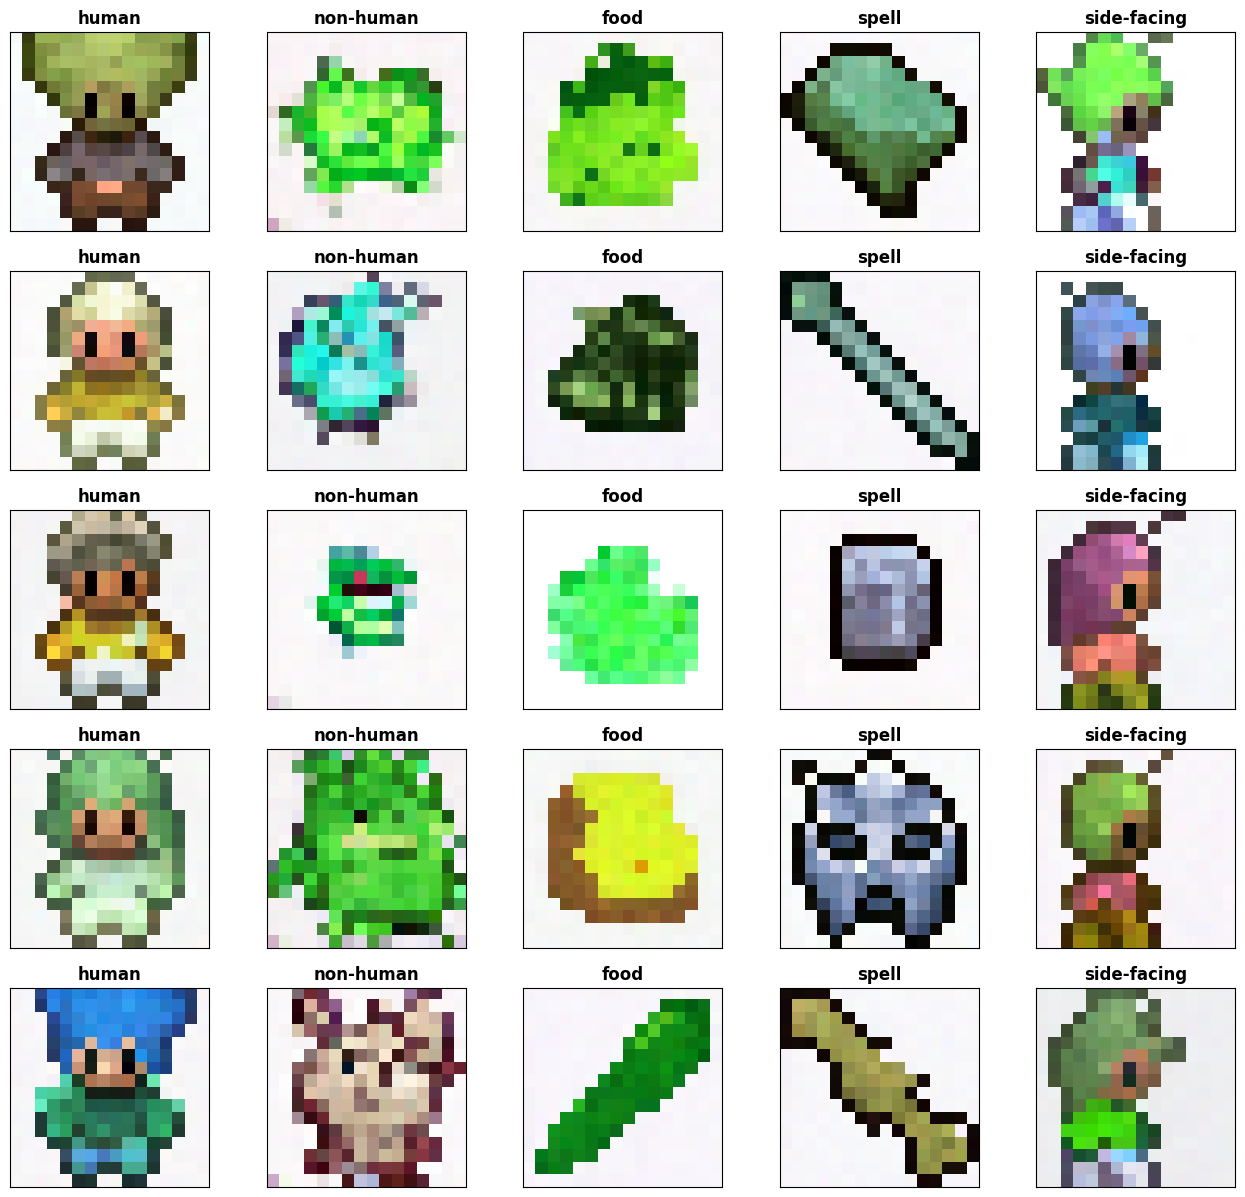

In [3]:
import matplotlib.pyplot as plt

# torch
import torch
import torch.nn.functional as F

# custom imports
from ddpm import Diffusion
from model import UNet
from dataset.helpers import *
from util import show, set_seed, CLASS_LABELS
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
set_seed()

# Load model
ddpm_cFg = Diffusion(img_size=16, T=500, beta_start=1e-4, beta_end=0.02, diff_type='DDPM-cFg', device=device)

unet_ddpm_cFg = UNet(num_classes=5, device=device)
unet_ddpm_cFg.eval()
unet_ddpm_cFg.to(device)
unet_ddpm_cFg.load_state_dict(torch.load('weights/DDPM-cfg/model.pth', map_location=device))


def sample_and_plot(num_samples=5,CLASS_LABELS = None, diffusionModel = None,noiseModel = None,scale = 1,device=None):
    y = torch.arange(0,5).repeat(num_samples).to(device)
    y = F.one_hot(y, num_classes=5).float()
    x_new = diffusionModel.p_sample_loop(noiseModel, 5*num_samples, y=y,classifier_scale=scale)
    for i in range(num_samples):
        CLASS_LABELS += CLASS_LABELS

    fig_titles = CLASS_LABELS
    imgs = [im_normalize(tens2image(x_gen.cpu())) for x_gen in x_new]
    fig, axs = plt.subplots(num_samples, ncols=5, figsize=(16, num_samples*3))

    row = 0
    col = 0
    for i, img in enumerate(imgs):
        if(i%5==0 and i>0):
            row += 1 
            col = 0
        axs[row,col].imshow(img)
        #axs[j,i].axis('off')
        axs[row,col].xaxis.set_ticks([])
        axs[row,col].yaxis.set_ticks([])
        axs[row,col].set_title(fig_titles[i],fontweight="bold")
        col += 1

    plt.savefig(f"sample_cfg_{num_samples}_rounds.png", bbox_inches='tight', pad_inches=0)
    plt.show()
    return




# Sample
#y = torch.tensor([0,1,2,3,4], device=device) 
#y = F.one_hot(y, num_classes=5).float()
#x_new = ddpm_cFg.p_sample_loop(unet_ddpm_cFg, 5, y=y)
#imgs = [im_normalize(tens2image(x_gen.cpu())) for x_gen in x_new]
#show(imgs, fig_titles=CLASS_LABELS, title='classifier FREE guidance', save_path='assets/cFg_samples.png')

sample_and_plot(5,CLASS_LABELS,ddpm_cFg,noiseModel = unet_ddpm_cFg,device=device,scale=10)


